# from allcools page:

Preclustering and Cluster Enriched Features
Purpose
The purpose of this step is to perform a simple pre-clustering using the highly variable features to get a pre-clusters labeling. We then select top enriched features for each cluster (CEF) for further analysis.



Input¶
HVF adata file.

Output
HVF adata file with pre-clusters and CEF annotated.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
from ALLCools.clustering import cluster_enriched_features, significant_pc_test, log_scale
from ALLCools.clustering import log_scale

In [2]:
sns.set_context(context='notebook', font_scale=1.3)

In [3]:
adata_path = 'mCG.HVF.h5ad'
adata_path2 = 'mCG.HVF_c0.h5ad'
var_dim = 'chrom100k'
# Cluster Enriched Features analysis
top_n=500
alpha=0.05
stat_plot=True

# you may provide a pre calculated cluster version. 
# If None, will perform basic clustering using parameters below.
cluster_col = 'Group'  

# These parameters only used when cluster_col is None
k=25
resolution=1
cluster_plot=True

In [4]:

cell_meta = pd.read_csv('../L1_clustering_labels_expanded.csv')
adata = anndata.read_h5ad(adata_path)
adata.obs = cell_meta
adata

AnnData object with n_obs × n_vars = 120 × 25000
    obs: 'cell', 'leiden', 'umap_0', 'umap_1', 'L1', 'L1_proba', 'Group', 'AnimalID', 'Type', 'TotalRead', 'mCGFrac'
    var: 'chrom', 'end', 'start', 'CHN_mean', 'CHN_dispersion', 'CHN_cov', 'CHN_score', 'CHN_feature_select', 'CGN_mean', 'CGN_dispersion', 'CGN_cov', 'CGN_score', 'CGN_feature_select', 'leiden_enriched_features'
    uns: 'leiden', 'leiden_colors', 'leiden_feature_enrichment', 'log', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

/share/lasallelab/Ensi/anaconda3/lib/python3.11/site-packages/scanpy/tools/_umap.py:184: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["umap"] = {"params": {"a": a, "b": b}}
/share/lasallelab/Ensi/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


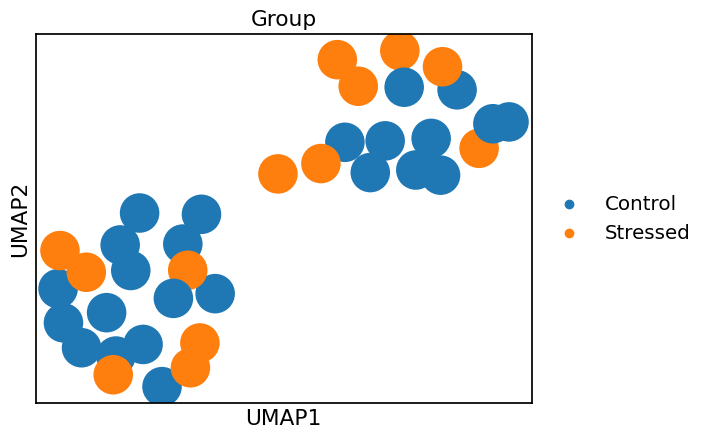

In [8]:
adatac0 = adata[adata.obs['L1'] == 'c0']

sc.tl.umap(adatac0)
sc.pl.umap(adatac0, color='Group')

In [14]:
#save plot
plt.savefig(f"mcg_precluster_{var_dim}_c0_bygroup.png")

<Figure size 640x480 with 0 Axes>

Found 2 clusters to compute feature enrichment score
Computing enrichment score
Computing enrichment score FDR-corrected P values


/share/lasallelab/Ensi/anaconda3/lib/python3.11/site-packages/ALLCools/clustering/feature_selection/feature_enrichment.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, sub_df in raw_adata.obs.groupby(labels):
/share/lasallelab/Ensi/anaconda3/lib/python3.11/site-packages/ALLCools/clustering/feature_selection/feature_enrichment.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, sub_df in raw_adata.obs.groupby(labels):


Selected 3 unique features


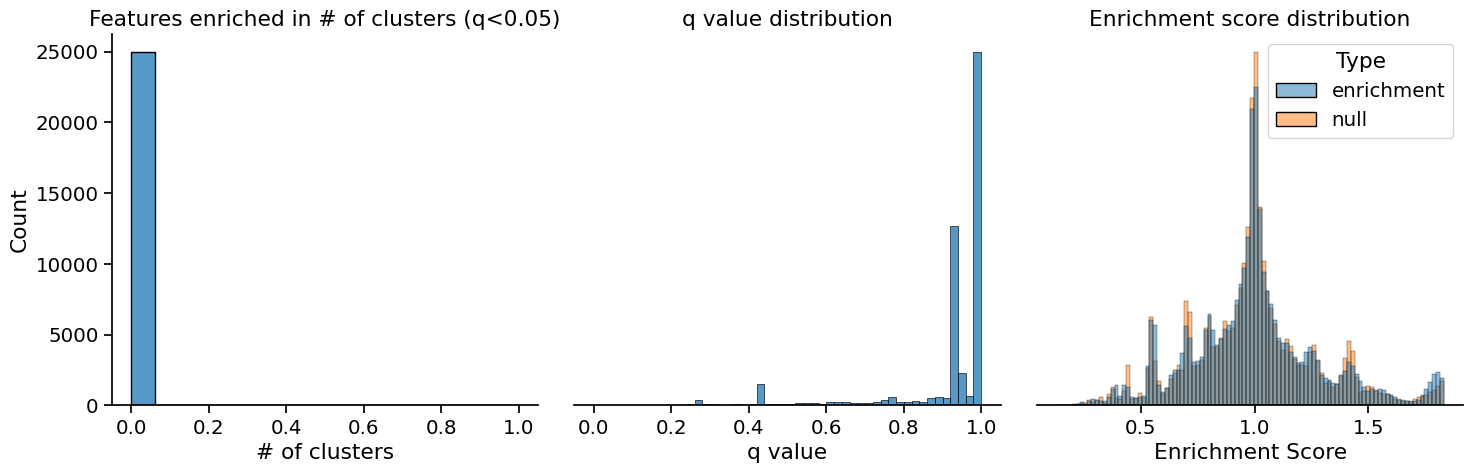

In [15]:
cluster_enriched_features(adatac0,
                          cluster_col=cluster_col,
                          top_n=top_n,
                          alpha=alpha,
                          stat_plot=True)

In [16]:
# save 
plt.savefig(f"mcg_CEF_alpha0.05topn500_{var_dim}_c0_bygroup.png")

<Figure size 640x480 with 0 Axes>

In [18]:
# save adata
adatac0.write_h5ad(adata_path2)
adata

AnnData object with n_obs × n_vars = 120 × 25000
    obs: 'cell', 'leiden', 'umap_0', 'umap_1', 'L1', 'L1_proba', 'Group', 'AnimalID', 'Type', 'TotalRead', 'mCGFrac'
    var: 'chrom', 'end', 'start', 'CHN_mean', 'CHN_dispersion', 'CHN_cov', 'CHN_score', 'CHN_feature_select', 'CGN_mean', 'CGN_dispersion', 'CGN_cov', 'CGN_score', 'CGN_feature_select', 'leiden_enriched_features'
    uns: 'leiden', 'leiden_colors', 'leiden_feature_enrichment', 'log', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'